In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert/keras/bert_base_en_uncased/2/config.json
/kaggle/input/bert/keras/bert_base_en_uncased/2/tokenizer.json
/kaggle/input/bert/keras/bert_base_en_uncased/2/metadata.json
/kaggle/input/bert/keras/bert_base_en_uncased/2/model.weights.h5
/kaggle/input/bert/keras/bert_base_en_uncased/2/assets/tokenizer/vocabulary.txt
/kaggle/input/bert/keras/bert_base_en_uncased/3/config.json
/kaggle/input/bert/keras/bert_base_en_uncased/3/tokenizer.json
/kaggle/input/bert/keras/bert_base_en_uncased/3/metadata.json
/kaggle/input/bert/keras/bert_base_en_uncased/3/model.weights.h5
/kaggle/input/bert/keras/bert_base_en_uncased/3/assets/tokenizer/vocabulary.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.18.0
KerasNLP version: 0.18.1


In [27]:
 try:
    # detect and init the TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    # instantiate a distribution strategy
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("TPU not activated")
    strategy = tf.distribute.MirroredStrategy() # Works on CPU, single GPU and multiple GPUs in a single VM.
    
print("replicas:", strategy.num_replicas_in_sync)

TPU not activated
replicas: 2


In [28]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import numpy as np

In [29]:

df1=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [30]:
df2=pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
df2

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [31]:
df3=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df3

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [32]:


print("keyword 缺失值数量:", df1['keyword'].isna().sum())
print("location 缺失值数量:", df1['location'].isna().sum())


keyword 缺失值数量: 61
location 缺失值数量: 2533


In [33]:
df1[df1['keyword'].notna() & df1['location'].notna()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [34]:
print("keyword 种类数:", df1['keyword'].nunique())
print("location 种类数:", df1['location'].nunique())

keyword 种类数: 221
location 种类数: 3341


In [35]:
print("text 缺失值数量:", df1['text'].isna().sum())
print("target 缺失值数量:", df1['target'].isna().sum())

text 缺失值数量: 0
target 缺失值数量: 0


In [36]:
# 检查 df1['text'] 是否全部为字符串类型
all_text_str = df1['text'].apply(lambda x: isinstance(x, str)).all()
print("df1['text'] 是否全部为字符串类型:", all_text_str)
# 如果有不是字符串的，输出这些行
if not all_text_str:
    print("以下行的 text 列不是字符串：")
    print(df1[~df1['text'].apply(lambda x: isinstance(x, str))])

df1['text'] 是否全部为字符串类型: True


训练集形状: (7613, 5)
测试集形状: (3263, 4)

目标分布:
target
0    4342
1    3271
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

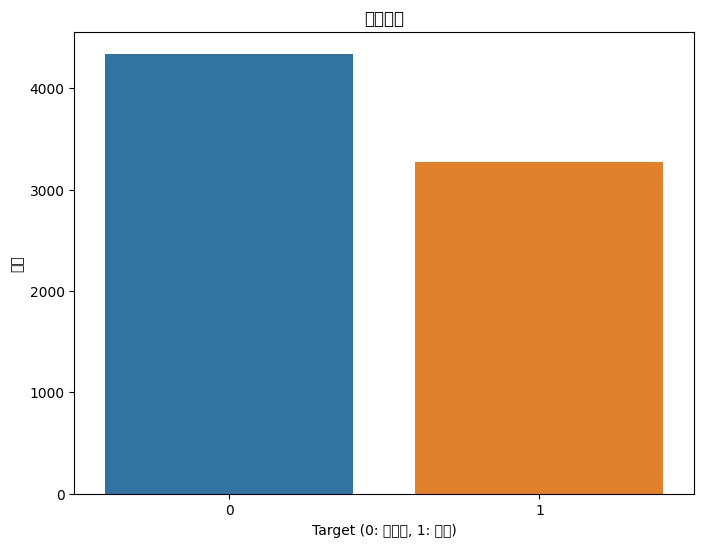

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

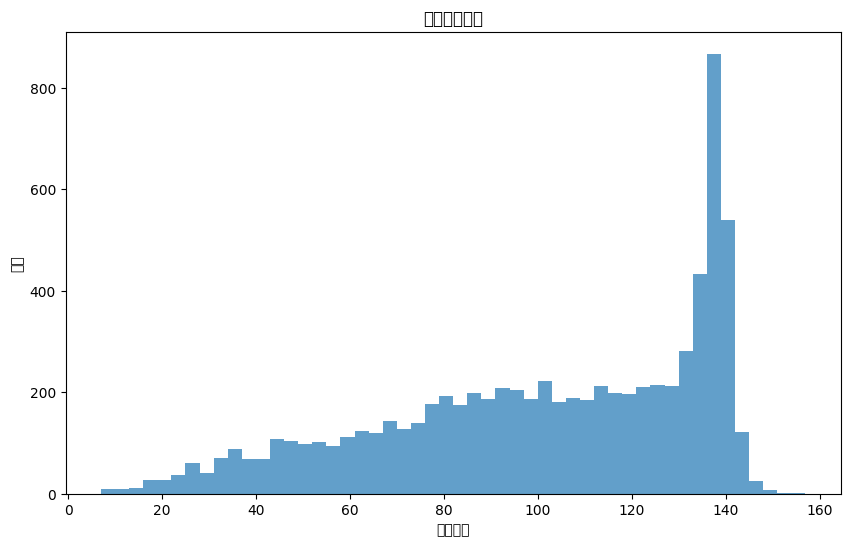

平均文本长度: 101.04
最大文本长度: 157


In [37]:

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者使用 ['Microsoft YaHei']，根据环境选择
plt.rcParams['axes.unicode_minus'] = False
# 数据探索
print("训练集形状:", df1.shape)
print("测试集形状:", df3.shape)
print("\n目标分布:")
print(df1['target'].value_counts())

# 可视化目标分布
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='target')
plt.title('目标分布')
plt.xlabel('Target (0: 非灾难, 1: 灾难)')
plt.ylabel('数量')
plt.show()

# 查看文本长度分布
df1['text_length'] = df1['text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df1['text_length'], bins=50, alpha=0.7)
plt.title('文本长度分布')
plt.xlabel('文本长度')
plt.ylabel('频率')
plt.show()

print(f"平均文本长度: {df1['text_length'].mean():.2f}")
print(f"最大文本长度: {df1['text_length'].max()}")

In [38]:
# 数据预处理
from sklearn.model_selection import train_test_split

# 分割训练集和验证集
X = df1['text'].values
y = df1['target'].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 测试集文本
X_test = df3['text'].values

print(f"训练集大小: {len(X_train)}")
print(f"验证集大小: {len(X_val)}")
print(f"测试集大小: {len(X_test)}")
# ...existing code...
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 强制标签为 int 类型
y_train = y_train.astype(int)
y_val = y_val.astype(int)
# ...existing code...

训练集大小: 6090
验证集大小: 1523
测试集大小: 3263


In [39]:
print(np.unique(y_train))
print(np.unique(y_val))
print(type(X_train), X_train.dtype)
print(type(y_train), y_train.dtype)

[0 1]
[0 1]
<class 'numpy.ndarray'> object
<class 'numpy.ndarray'> int64


In [40]:
# 配置参数
MAX_LENGTH = 128
BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5

# 在分布式策略范围内构建模型
with strategy.scope():
    # 加载预训练的BERT模型
    preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
        "bert_base_en_uncased",
        sequence_length=MAX_LENGTH,
    )
    
    # 构建BERT分类器
    classifier = keras_nlp.models.BertClassifier.from_preset(
        "bert_base_en_uncased",
        num_classes=2,
        preprocessor=preprocessor,
    )
    
    # 编译模型
    classifier.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=["accuracy"],
    )

print("模型构建完成")
classifier.summary()

模型构建完成


Preprocessor: "bert_text_classifier_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_text_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 768), (None,      │     109,482,240 │ padding_mask[0][0],        │
│                               │ None, 768)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 768)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 109,483,778 (417.65 MB)

 Trainable params: 109,483,778 (417.65 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
print(X_train.dtype, type(X_train[0]))
print(X_val.dtype, type(X_val[0]))

object <class 'str'>
object <class 'str'>


In [46]:
# ...existing code...
# 构建 preprocessor（单独使用），但不要把它传给模型
with strategy.scope():
    preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
        "bert_base_en_uncased",
        sequence_length=MAX_LENGTH,
    )

    # 构建BERT分类器，但不内置 preprocessor（自己在数据管线里调用）
    classifier = keras_nlp.models.BertClassifier.from_preset(
        "bert_base_en_uncased",
        num_classes=2,
        preprocessor=None,
    )

    classifier.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=["accuracy"],
    )

print("模型构建完成")
classifier.summary()
# ...existing code...

模型构建完成


Model: "bert_text_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 768), (None,      │     109,482,240 │ padding_mask[0][0],        │
│                               │ None, 768)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 768)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 109,483,778 (417.65 MB)

 Trainable params: 109,483,778 (417.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ...existing code...
# 确保类型
X_train = X_train.astype(str)
X_val = X_val.astype(str)
y_train = y_train.astype(np.int32)
y_val = y_val.astype(np.int32)

def preprocess_and_cast(text, label):
    x = preprocessor(text)  # 得到 dict: token_ids, segment_ids, padding_mask (bool)
    # 把 padding_mask 转为 int32（避免 AddN 报错）
    if 'padding_mask' in x:
        x['padding_mask'] = tf.cast(x['padding_mask'], tf.int32)
    return x, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(2048).map(preprocess_and_cast, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.map(preprocess_and_cast, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

history = classifier.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, verbose=1)
# ...existing code...

Epoch 1/3
381/381 ━━━━━━━━━━━━━━━━━━━━ 225s 448ms/step - accuracy: nan - loss: nan - val_accuracy: 0.7687 - val_loss: 0.5718
Epoch 2/3
381/381 ━━━━━━━━━━━━━━━━━━━━ 166s 433ms/step - accuracy: nan - loss: nan - val_accuracy: 0.8005 - val_loss: 0.5729
Epoch 3/3
215/381 ━━━━━━━━━━━━━━━━━━━━ 1:07 407ms/step - accuracy: nan - loss: nan